### Callie Federer Tutorial
### Janelia Theoretical Neuroscience Workshop 10.18.17

This tutorial was created with Python 3 (but there should be minimal if any changes using Python 2). The only required packages are numpy, matplotlib.pyplot and copy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math 

def sigmoid (x):
    x2 = copy.deepcopy(x)
    ''' Returns sigmoid of x '''
    return 1/(1 + np.exp(-x2))     

def d_sigmoid(x): 
    x2 = copy.deepcopy(x)
    ''' Returns derivative of sigmoid of x'''
    return x2 * (1 - x2)  

def relu(x):
    """ Returns ReLU of x """
    x2 = copy.deepcopy(x)
    return np.maximum(0,x2) 

def d_relu(x):
    """ Returns derivative of ReLU of x """
    x2 = copy.deepcopy(x)
    x2[x2>0] = 1
    x2[x2<0] = 0
    return x2 

# Random Feedback Weights 

In [10]:
epochs = 60000
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1

## XOR Data
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

# weights on layer inputs
w0 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
w1 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

## fixed random feedback weights 
b0 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
b1 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))


Fill in code below to train a network with random feedback weights to solve the XOR dataset. You can refer to the Lillicrap Random Feedback Weights paper in the sources folder for additional info. 

(You can make a simple feedforward network instead of an RNN)

In [11]:
for i in range(epochs):
    
    h = sigmoid(np.dot(x, w0))                   # hidden layer 
    y_ = sigmoid(np.dot(h, w1))                  # output layer 
    e = y - y_    # error 
    dy_ = e * d_sigmoid(sigmoid(np.dot(h, b1)))  # delta output
    dh =  dy_.dot(w1.T) * d_sigmoid(sigmoid(np.dot(x, b0))) 
    w1 +=  h.T.dot(dy_)                          # update output layer weights
    w0 +=  x.T.dot(dh)                           # update hidden layer weights
    

In [12]:
print('Final error: ')
print(e)
print('Final y estimate: ')
print(np.round(y_, 2))                

Final error: 
[[-0.0069464 ]
 [ 0.00564144]
 [ 0.00545513]
 [-0.00663289]]
Final y estimate: 
[[ 0.01]
 [ 0.99]
 [ 0.99]
 [ 0.01]]


Additional thing to try: implement backpropagation and compare the speed and accuracy over time

## Three Factor Rules

Working memory: Use the rate-based model equations from arxiv paper (in sources folder) and train the network with 3-factor rules to store information for working memory 

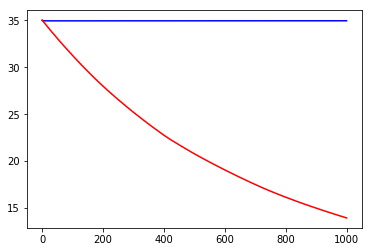

In [13]:
def run_network(v, r, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Plastic'):
    stims = list()
    for t in range(time):
        v = v*(1-dt) + dt*(np.dot(L,r))         ## update voltages 
        r = relu(v)        ## calculate  firing rates
        s =  np.dot(np.transpose(d), r)[0]      ## calculate remembered stimulus value 
        stims.append(s)
        if(synapses=='Plastic'):
            drdv = d_relu(r)
            E =    np.vdot(d*drdv, (-v + np.dot(L,r)))   ## calculate the error (reminder: ds/dt)
            L = L -  2*eta*E*np.transpose(d)*drdv*np.transpose(r)## update synapses  
    return stims

n = 100 ## neurons
n_stim = 1 ## one scalar stimulus 

## randomly initialize network
v = np.random.randn(n, 1)       ## voltages 
r = relu(v)                     ## firing rates 
d = abs(np.random.randn(n, n_stim)) ## read out weights
L = np.random.randn(n, n)  ## connectivity 
L = np.divide(L, math.sqrt(n))  ## reduce eigenspectrum 
stims_plastic = run_network(v, r, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Plastic')
stims_constant = run_network(v, r, d, L, dt=.001, eta=.0001, time=1000, tau = 1, synapses = 'Constant')            

plt.plot(list(range(len(stims_plastic))), stims_plastic, 'blue')
plt.plot(list(range(len(stims_constant))), stims_constant, 'red')
plt.show()
    
 